# k-nearest neighbour (KNN)
## Implementation

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class KNN():
    
    def __init__(self, X, y, neighbourSize = 5, distanceType = 0):
        
        self.X = X
        self.y = y
        self.neighbourSize = neighbourSize
        self.distanceType = distanceType
        
    def pred(self, Z):
        
        z_pred = np.zeros(Z.shape[0])
        
        # Pred each sample
        for i, z in enumerate(Z):
            d = np.zeros(self.X.shape[0])
            for j, x in enumerate(self.X):
                d[j] = self.distance(x, z, self.distanceType)
            
            # Sort distances
            d_sort_idxs = np.argsort(d)
            neighbourLabels = self.y[d_sort_idxs][:self.neighbourSize]
            
            vals, counts = np.unique(neighbourLabels, return_counts = True)
            z_pred[i] = vals[np.argmax(counts)]
            
        return z_pred
            
    def distance(self, x, y, distanceType, p = 2):
                
        if (distanceType == 0):
            return distance.euclidean(x, y)
        elif (distanceType == 1):
            return distance.cosine(x, y)
        elif (distance == 2):
            return distance.hamming(x, y)
        elif (distance == 3):
            return distance.minkowski(x, y, p)

# Finding optimal value of K
Determine the minimum value of k required to correctly estimate each training sample.

In [34]:
data = np.loadtxt("CleanDataNorm.csv", dtype = str, delimiter = ',')
y = data[1:, 23].astype(int)
X = data[1:, :23].astype(float)
X_headers = data[0, :].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [3]:
def getK_val_data(w, m, file_name):
    k_values = []
    for i, sample in enumerate(tqdm(X_train)):
        
        X_train_samples = np.delete(X_train, [i], axis = 0)
        y_train_samples = np.delete(y_train, [i], axis = 0)
        
        k = 0
        found_k = False
        
        while ((not found_k) and (k < (len(y_train_samples)))):
            k+= 1
            k_model = KNeighborsClassifier(n_neighbors = k, n_jobs = -1, weights = w, metric = m)
            k_model.fit(X_train_samples, y_train_samples)
    
            y_sample_pred = k_model.predict([sample])
            y_sample_true = y_train[i]
    
            #print(y_sample_pred == y_sample_true, k)
            if (y_sample_pred == y_sample_true):
                k_values.append(k)
                found_k = True
        
    k_values = np.array(k_values)
    np.savetxt(file_name, k_values)

#print(len(k_values), len(X_train))

In [ ]:
getK_val_data("uniform", "euclidean", "./K_data/k_data_uni_euc")
getK_val_data("distance", "euclidean", "./K_data/k_data_dist_euc")
getK_val_data("uniform", "manhattan", "./K_data/k_data_uni_man")
getK_val_data("distance", "manhattan", "./K_data/k_data_dist_man")
getK_val_data("uniform", "cosine", "./K_data/k_data_uni_cos")
getK_val_data("distance", "cosine", "./K_data/k_data_dist_cos")

  1%|▍                                   | 113/10195 [03:15<17:06:15,  6.11s/it]

In [3]:
#for i in np.sort(k_values)[::-1]:
#    print(i)

k_vals = np.loadtxt("./K_data/k_data_dist_man")

#k_vals = k_vals[np.argwhere(k_vals > 1)][:, 0]
print(len(k_vals), len(X_train))
print(np.median(k_vals))
print(np.mean(k_vals))

#print(np.sort(k_vals))
np.percentile(k_vals, 99.9)

10062 10195
1.0
3.3035181872391175


328.1090000000095

In [7]:
%%time
k_model = KNN(X_train, y_train, neighbourSize = 100, distanceType = 0)
accuracy_score(y_test, k_model.pred(X_test))

NameError: name 'KNN' is not defined

In [21]:
X_train_selected_features = X_train[:, [5, 10, 11, 13, 17, 20, 21, 22]]
print(X_headers[[5, 10, 11, 13, 17, 20, 21, 22]])

sk_k_model = KNeighborsClassifier(n_neighbors = 11, metric = "minkowski")
sk_k_model.fit(X_train_selected_features, y_train)
np.mean(cross_val_score(sk_k_model, X_train_selected_features, y_train, cv=5))
#accuracy_score(y_test, sk_k_model.predict(X_test))

['Eccentricity' 'Solidity' 'roundness' 'ShapeFactor1' 'ShapeFactor5'
 'Colour_brown' 'Colour_green' 'Colour_white']


0.9855811672388427

In [9]:
iris = load_iris()
iris_data = iris.data
iris_labels = iris.target

breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_labels = breast_cancer.target

#X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_labels, test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_labels, test_size = 0.25)

# Classification Tree

In [72]:
data = pd.read_csv("CleanDataDT.csv", na_values = "NA")
#data = data.fillna(0)
beans_lables = data["Class"].to_numpy()
beans_data = data.drop(["Class"], axis = 1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(beans_data, beans_lables, test_size = 0.25, random_state = 42)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

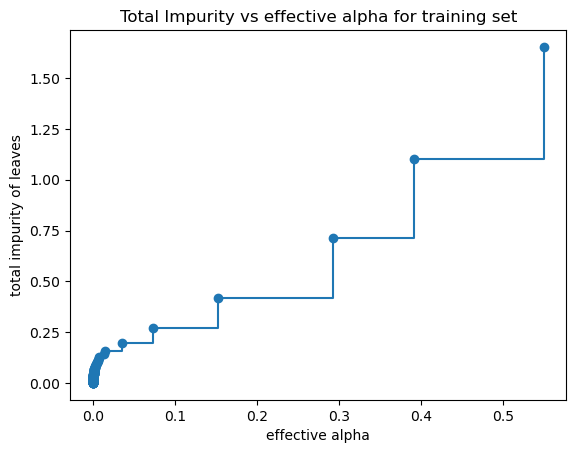

In [77]:
clf = tree.DecisionTreeClassifier(random_state=0, criterion = 'entropy')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [78]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion = 'entropy')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.9913141935137844


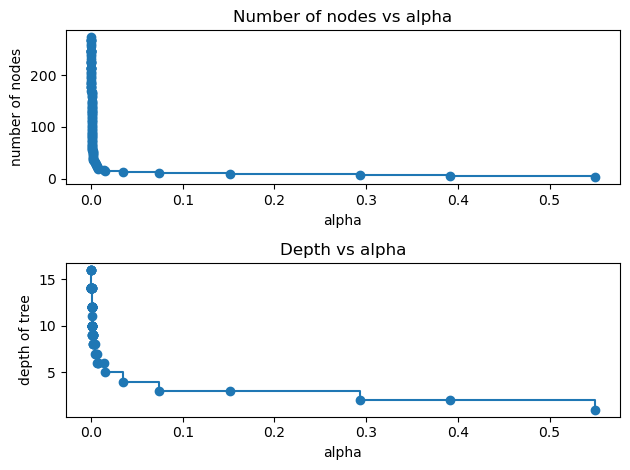

In [79]:


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


65
0.9805825242718447
0.9778330350786044
0.0008124981755912295
58
0.9789123323519788
0.9788172992056487
0.0006608019281363437


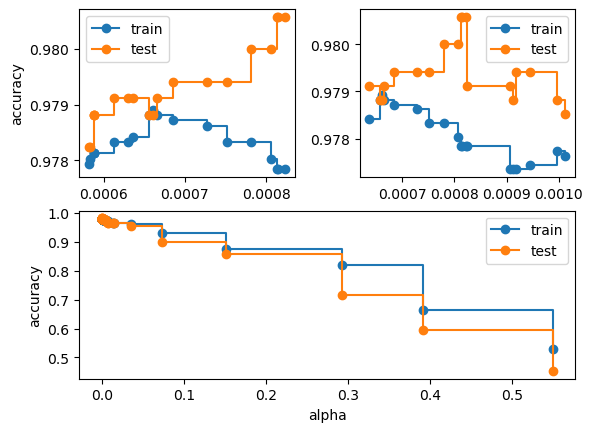

In [80]:
#train_scores = [clf.score(X_train, y_train) for clf in clfs]

train_scores = [np.mean(cross_val_score(clf, X_train, y_train, cv=10)) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

ccp_alphas = np.array(ccp_alphas)
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

m = np.argmax(test_scores)
print(m)
print(test_scores[m])
print(train_scores[m])
print(ccp_alphas[m])
best_alpha_range_test = np.r_[m-9:m,m,m+1:m+10]

n = np.argmax(train_scores)
print(n)
print(train_scores[n])
print(test_scores[n])
print(ccp_alphas[n])
best_alpha_range_train = np.r_[n-9:n,n,n+1:n+10]

plt.subplot(2, 2, 1),
#plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas[best_alpha_range_train], train_scores[best_alpha_range_train], marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas[best_alpha_range_train], test_scores[best_alpha_range_train], marker="o", label="test", drawstyle="steps-post")
plt.legend()

plt.subplot(2, 2, 2),
#plt.xlabel("alpha")
plt.plot(ccp_alphas[best_alpha_range_test], train_scores[best_alpha_range_test], marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas[best_alpha_range_test], test_scores[best_alpha_range_test], marker="o", label="test", drawstyle="steps-post")
plt.legend()

plt.subplot(2, 1, 2),
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()

plt.subplots_adjust(wspace=0.3)
#plt.savefig("CT_Gini_Plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [44]:
data = pd.read_csv("CleanDataDT.csv", na_values = "NA")
data = data.drop("Class", axis = 1)
data.shape

(13594, 23)

In [53]:
features = np.array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.])

data.loc[:, features == 1.0]

,Perimeter,MajorAxisLength,Eccentricity,Constantness,EquivDiameter,Solidity,roundness,ShapeFactor5,Colour_black,Colour_green,Colour_white
0,1132.054,439.915710,0.824453,1,328.294351,0.975443,0.830027,0.984066,0.0,0.0,0.0
1,736.873,271.659919,0.727175,1,224.839282,0.989977,0.918880,0.997891,1.0,0.0,0.0
2,687.914,237.704180,0.588537,1,213.603696,0.990191,0.951588,0.998803,0.0,1.0,0.0
3,1817.278,680.812555,0.787040,1,532.894907,0.987365,0.848673,0.993144,0.0,0.0,0.0
4,767.143,287.962974,0.762918,1,231.130508,0.991657,0.895904,0.996497,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13589,578.382,203.761000,0.706041,1,171.194123,0.980950,0.864665,0.996776,1.0,0.0,0.0
13590,1095.057,387.116310,0.802155,1,298.056610,0.981958,0.731179,0.992787,0.0,0.0,0.0
13591,968.988,347.920243,0.809040,0,266.481499,0.977668,0.746444,0.998113,0.0,0.0,0.0
13592,1005.875,409.304636,0.870169,1,285.983465,0.987957,0.797799,0.990736,0.0,0.0,1.0


Text(0, 0.5, 'PC2')

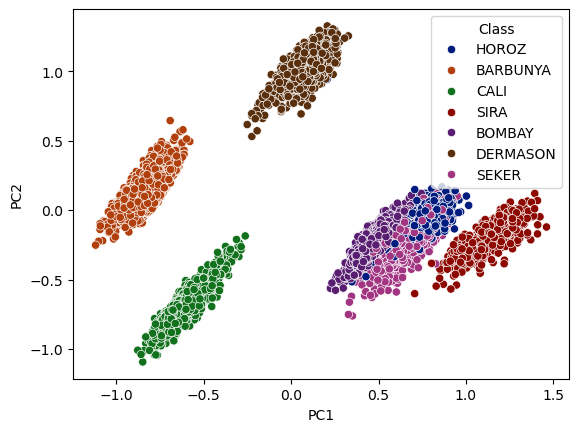

In [229]:
from sklearn.decomposition import PCA

data = pd.read_csv("CleanDataNorm.csv", na_values = "NA")
X = data.drop("Class", axis = 1)#.loc[:, features == 1.0]
y = data["Class"].replace([0,1,2,3,4,5,6],
         ["BARBUNYA", "BOMBAY", "CALI", "DERMASON", "HOROZ", "SEKER", "SIRA"])

pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)

sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = y, palette = "dark")
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.savefig("PCA_Full.pdf", format="pdf", bbox_inches="tight")

0.9879376287143278
[0.98455882 0.99044118 0.98897059 0.98676471 0.99116998 0.98454746
 0.98601913 0.98601913 0.98307579 0.98233996]


Text(0, 0.5, 'PC2')

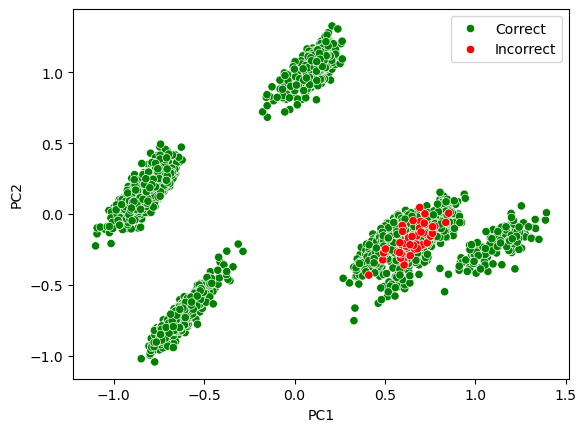

In [218]:
data = pd.read_csv("CleanDataNorm.csv", na_values = "NA")

X = data.drop("Class", axis = 1).loc[:, features == 1.0]
X_full = data.drop("Class", axis = 1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size = 0.25, random_state = 42)

knn_model = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", weights = "distance")
knn_model.fit(X_train, y_train)
print(knn_model.score(X_test, y_test))
knn_cross_score = cross_val_score(knn_model, X, y, cv = 10)
print(knn_cross_score)

# Plot
custom_palette = {
    "Correct": 'green',
    "Incorrect": 'red'
}

test_pca = pca.transform(X_test_full)
correctly_label = np.array(knn_model.predict(X_test) == y_test)
indx_sort = np.argsort(correctly_label)[::-1]
correctly_label = correctly_label[indx_sort]
string_array = np.where(correctly_label, 'Correct', 'Incorrect')

sns.scatterplot(x = test_pca[indx_sort, 0], y = test_pca[indx_sort, 1], hue = string_array, palette = custom_palette)
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.savefig("PCA_KNN.pdf", format="pdf", bbox_inches="tight")

0.9805825242718447
[0.98014706 0.97279412 0.98161765 0.97720588 0.98454746 0.97571744
 0.97939662 0.98233996 0.97866078 0.98160412]


<Axes: >

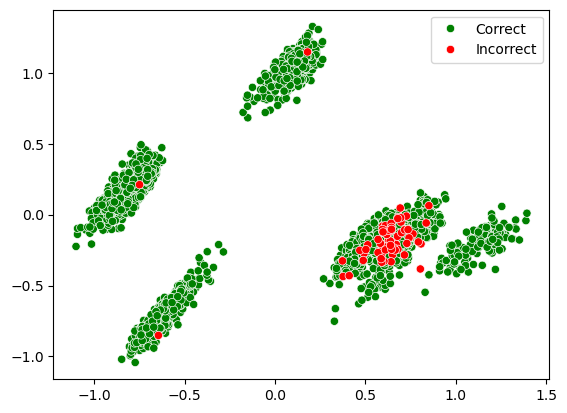

In [225]:
data = pd.read_csv("CleanDataDT.csv", na_values = "NA")

X = data.drop("Class", axis = 1)
y = data["Class"]

X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X, y, test_size = 0.25, random_state = 42)

ct = tree.DecisionTreeClassifier(ccp_alpha = 0.0008124981755912295, criterion = "entropy")
ct.fit(X_train_ct, y_train_ct)
print(ct.score(X_test_ct, y_test_ct))
ct_cross_score = cross_val_score(ct, X, y, cv = 10)
print(ct_cross_score)

# Plot
custom_palette = {
    "Correct": 'green',
    "Incorrect": 'red'
}

#test_pca = pca.transform(X_test)

correctly_label = np.array(ct.predict(X_test_ct) == y_test_ct)
indx_sort = np.argsort(correctly_label)[::-1]
correctly_label = correctly_label[indx_sort]
string_array = np.where(correctly_label, 'Correct', 'Incorrect')

sns.scatterplot(x = test_pca[indx_sort, 0], y = test_pca[indx_sort, 1], hue = string_array, palette = custom_palette)
#plt.savefig("PCA_CT.pdf", format="pdf", bbox_inches="tight")

In [189]:
import scipy.stats as stats

# Perform the Wilcoxon signed-rank test
stat1, p_value1 = stats.wilcoxon(knn_cross_score, ct_cross_score)
stat2, p_value2 = stats.ttest_ind(knn_cross_score, ct_cross_score)

print(knn_cross_score, np.round(np.mean(knn_cross_score), 5), np.round(np.median(knn_cross_score), 5))
print(ct_cross_score, np.round(np.mean(ct_cross_score), 5), np.round(np.median(ct_cross_score), 5))

print(stat1, np.round(p_value1, 5))
print(stat2, np.round(p_value2, 5))
print(0.00009)

[0.98455882 0.99044118 0.98897059 0.98676471 0.99116998 0.98454746
 0.98601913 0.98601913 0.98307579 0.98233996] 0.98639 0.98602
[0.98014706 0.97279412 0.98014706 0.97720588 0.98454746 0.97571744
 0.97939662 0.98233996 0.97866078 0.98160412] 0.97926 0.97977
0.0 0.00195
4.990665540187299 9e-05
9e-05
